# WD & Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd 'drive/MyDrive/TikTok Hackathon'

/content/drive/MyDrive/TikTok Hackathon


In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm
import math
import random

import matplotlib.pyplot as plt

In [19]:
ads = pd.read_csv("ads_scored.csv") # TODO Change the path here
rev = pd.read_csv("reviewers_scored.csv") # TODO Change the path here

## Reviewers Data Wrangling

1. Ensure the market expertise of each reviewer is stored in a list, instead of a string

In [ ]:
rev['market'][0]   #just a string

'["VN"]'

In [21]:
rev['market'] = rev['market'].apply(lambda x: eval(x))

In [23]:
rev['market'][2]

['MX', 'UY', 'CL', 'AR', 'CO', 'EC', 'PE', 'BR']

2. Assign a maximum ads (max cap) that can be assigned to each reviewer based on their current utilization

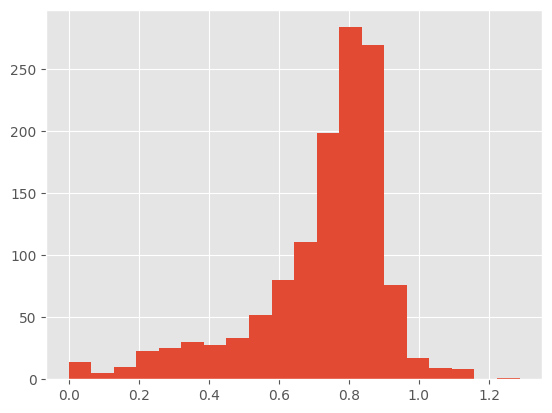

In [24]:
plt.style.use('ggplot')
_ = plt.hist(rev['Utilisation %'], bins = 20)

In [25]:
len(ads)/len(rev)

23.457254901960784

On average, each reviewer should get 23.46 ads to review. Most reviers have utilization rates around 0.7-0.8.

In [26]:
def cap(util):
  if 0 <= util <= 0.2:
    return 80
  elif 0.2 < util <= 0.4:
    return 64
  elif 0.4 < util <= 0.6:
    return 48
  elif 0.6 < util <= 0.8:
    return 32
  elif 0.8 < util < 1.0:
    return 16
  else:
    return 1

In [27]:
rev['max_cap'] = rev['Utilisation %'].apply(cap)

In [ ]:
rev[['max_cap', 'Utilisation %']]

,max_cap,Utilisation %
0,32,0.704833
1,16,0.819167
2,32,0.775474
3,16,0.843229
4,32,0.678776
...,...,...
1270,16,0.861444
1271,32,0.685469
1272,16,0.890927
1273,16,0.843042


In [28]:
np.mean(rev['max_cap'])

29.67058823529412

In [29]:
np.max(rev['max_cap'])

80

In [30]:
np.min(rev['max_cap'])

1

The average of the maximum capacity is slightly more than the required average, which ensures all ads can be assigned with enough flexibility for matches based on market expertise OR ad complexity-reviewer productivity

## Indexing/Primary Key

We need to establish an index/primary key to uniquely identify each advertisment and reviewer

### Ads

In [ ]:
ads['ad_id'].nunique() == len(ads)

False

Each ad_id is not unique since there could be mutliple requests from the same ad group.

As such, we can simply use the dataframe's index as a unique identifier for each ad

In [ ]:
ads

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,v1,v2,v3,score,scaled_score
0,20230807,1747578422390810,US,USCA,1.000000e+00,2023-07-24,5136.888282,4799.968282,2022-10-24 14:36:00,1.78,Auction Ads,auction_relation,6.931472e-01,8.544397,8.476573,7.855396,0.288041
1,20230807,1758543228094480,SA,MENA,1.000000e+00,2023-06-14,1980.968282,1068.485282,2023-02-22 15:50:00,1.67,RIE,Ad Group Recall (Merged),6.931472e-01,7.591846,6.974933,6.140400,0.246923
2,20230807,1738303151826990,AU,AU,2.000000e+00,2023-07-24,6.453782,10.083282,2022-07-14 05:00:00,1.84,Auction Ads,auction_relation,1.098612e+00,2.008722,2.405438,0.415169,0.109657
3,20230807,1738304016410620,NZ,NZ,2.000000e+00,2023-07-24,6.243282,10.083282,2022-07-14 05:17:00,1.58,Auction Ads,auction_relation,1.098612e+00,1.980074,2.405438,0.342925,0.107925
4,20230807,1738304421208090,NZ,NZ,2.000000e+00,2023-07-24,5.507182,10.083282,2022-07-14 05:24:00,1.58,Auction Ads,auction_relation,1.098612e+00,1.872906,2.405438,0.292128,0.106707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29903,20230807,1773564626657310,GB,NaN,2.220446e-16,2000-01-01,4.718282,4.718282,2023-08-09 00:00:00,5.96,Non-Auction Ads,Branding Ads,2.220446e-16,1.743668,1.743668,6.235358,0.249199
29904,20230807,1773600771048460,US,NaN,2.220446e-16,2000-01-01,4.718282,4.718282,2023-08-09 05:00:00,5.96,Non-Auction Ads,Branding Ads,2.220446e-16,1.743668,1.743668,6.235358,0.249199
29905,20230807,1773196249629690,TR,NaN,2.220446e-16,2000-01-01,4.718282,4.718282,2023-08-09 21:00:00,5.96,Non-Auction Ads,Branding Ads,2.220446e-16,1.743668,1.743668,6.235358,0.249199
29906,20230807,1773281664990280,SE,NaN,2.220446e-16,2000-01-01,4.718282,4.718282,2023-08-12 23:00:00,5.96,Non-Auction Ads,Branding Ads,2.220446e-16,1.743668,1.743668,6.235358,0.249199


In [ ]:
ads.loc[[29903]]

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en,v1,v2,v3,score,scaled_score
29903,20230807,1773564626657310,GB,NaN,2.220446e-16,2000-01-01,4.718282,4.718282,2023-08-09 00:00:00,5.96,Non-Auction Ads,Branding Ads,2.220446e-16,1.743668,1.743668,6.235358,0.249199


### Reviewers

In [ ]:
rev['moderator'].nunique() == len(rev)

True

Each reviewer has a unique moderator ID, it can be simply used as the index

In [31]:
rev.set_index('moderator', inplace = True)

In [32]:
rev

,market,Productivity,Utilisation %,handling time,accuracy,v1,v2,v3,score,scaled_score,max_cap
moderator,,,,,,,,,,,
1686755036370945,[RO],174.560000,0.704833,25547,0.959,13.212116,-0.041864,10.148275,17.238132,0.523279,32
1741913197768705,[VN],334.376000,0.819167,50794,1.000,18.285951,0.000000,10.835534,20.553804,0.649666,16
1743415203890193,"[MX, UY, CL, AR, CO, EC, PE, BR]",452.277500,0.775474,89626,0.941,21.266817,-0.060812,11.403401,21.173390,0.673283,32
1710346282427393,[PH],612.312500,0.843229,98066,0.887,24.744949,-0.119910,11.493396,22.405271,0.720240,16
1748544247125010,"[MX, UY, CO, CL, AR, EC, PE, BR]",292.330000,0.678776,80656,0.739,17.097661,-0.302457,11.297948,15.694622,0.464444,32
...,...,...,...,...,...,...,...,...,...,...,...
1694281660376066,[TR],273.432381,0.861444,64710,0.943,16.535791,-0.058689,11.077671,18.527639,0.572433,16
1734911746733057,"[US, CA]",180.750000,0.685469,79210,0.860,13.444330,-0.150823,11.279858,15.326669,0.450418,32
1694737747315714,[TH],542.360000,0.890927,49664,0.958,23.288624,-0.042908,10.813036,22.936656,0.740495,16


We also add another column in the reviewer's dataset to store the ads that have been assigned to them (as there can be multiple ads assigned to the same reviewer, but not vice versa).

In [46]:
rev['assigned_ads'] = np.empty((len(rev), 0)).tolist()

In [34]:
rev['assigned_ads']

moderator
1686755036370945    []
1741913197768705    []
1743415203890193    []
1710346282427393    []
1748544247125010    []
                    ..
1694281660376066    []
1734911746733057    []
1694737747315714    []
1730993346971650    []
1707706649725953    []
Name: assigned_ads, Length: 1275, dtype: object

# Stochastic Optimization

## Objective Function

The following is the objective funtion we aim to minimize (note that the range of the score is any positive number i.e greater than equal to 0).

The closer the score is to 0, the better is the match between the ad and the reviewer.

In [35]:
def match_score(ad, reviewer):

  score_diff = (ads.loc[ad, 'scaled_score'] - rev.loc[reviewer, 'scaled_score']) ** 2 # We use square to penalize more if the priority scores of the ad and the reviewer are significant different
  market = int(ads.loc[ad, 'delivery_country'] in rev.loc[reviewer, 'market'])
  curr_util = max(rev.loc[reviewer, 'Utilisation %'], 1)
  assign_priority = len(rev.loc[reviewer, 'assigned_ads'])/rev.loc[reviewer, 'max_cap'] # The more ads currently assigned to this moderator, the higher this score; the more max assignments this moderator can have, the lower this score

  return score_diff + market + curr_util + assign_priority


## Simulated Annealing

Note that not all experiments have been included!!

In [36]:
# All ads and reviewers in a list
all_ads = ads.index.tolist()
all_reviewers = rev.index.tolist()

In [37]:
rev['assigned_ads'] = np.empty((len(rev), 0)).tolist()

In [38]:
import time
random.seed(time.time())

We start with an intial set of assignments.

In [47]:
initial = {}
for ad in all_ads:
  initial[ad] = random.choice(all_reviewers)
  rev.loc[initial[ad], 'assigned_ads'].append(ad)


In [48]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())

72981.00354090928

In [49]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())/len(ads)

2.44018334696099

We start of with a simple simulated annealing that randomly reassigns a reviewer to an ad if the match is better (i.e. the match score is lower)

In [50]:
def simulated_annealing_assign(initial_assgn, max_iter):
  current = initial_assgn.copy()

  for iter in tqdm(range(max_iter)):
    #randomly select an ad to reassign
    re_ad = random.choice(all_ads)
    new_rev = random.choice(all_reviewers)
    while new_rev == current[re_ad]:
      new_rev = random.choice(all_reviewers)

    # Calculate the new score if reviewer reassigned
    difference = match_score(re_ad, new_rev) - match_score(re_ad, current[re_ad])

    # Swapping
    switch = False
    if difference <= 0:
        switch = True

    #Update to better score
    if switch:
        (rev.loc[current[re_ad], 'assigned_ads']).remove(re_ad)
        (rev.loc[new_rev, 'assigned_ads']).append(re_ad)
        current[re_ad] = new_rev

  return current


In [51]:
assignment = simulated_annealing_assign(initial, max_iter = 1000000)

100%|██████████| 1000000/1000000 [03:11<00:00, 5230.59it/s]


In [52]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment.items())

54437.69193463056

In [53]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment.items())/len(ads)

1.8201715906991627

In [54]:
### we define a reset initial function to reset our assigned_ads to empty and also reset our initial random assignment
def reset_initial():
  rev['assigned_ads'] = np.empty((len(rev), 0)).tolist()
  global initial
  initial = {}
  for ad in all_ads:
    initial[ad] = random.choice(all_reviewers)
    rev.loc[initial[ad], 'assigned_ads'].append(ad)


Let's try to run it longer

In [59]:
reset_initial()

In [61]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())

73418.87801765827

In [62]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())/len(ads)

2.4548240610424723

In [56]:
assignment = simulated_annealing_assign(initial, max_iter = 5000000)

100%|██████████| 5000000/5000000 [14:13<00:00, 5856.78it/s]


In [57]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment.items())

54430.53103534958

In [58]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment.items())/len(ads)

1.8199321598017113

The match score is slightly better but still not as improved as it should based on the additional iterations.

Next we try a simulated annealing with a temperature and alpha/cooling rate to add some randomness into whether we accept a reassignment or not (sometimes not doing a reassignment may lead to better states towards the global optima)

In [63]:
reset_initial()

In [64]:
def simulated_annealing_assign_decay(initial_assgn, T, alpha, max_iter):
  current = initial_assgn.copy()

  for iter in tqdm(range(max_iter)):
    #randomly select an ad to reassign
    re_ad = random.choice(all_ads)
    new_rev = random.choice(all_reviewers)
    while new_rev == current[re_ad]:
      new_rev = random.choice(all_reviewers)

    # Calculate the new score if reviewer reassigned
    difference = match_score(re_ad, new_rev) - match_score(re_ad, current[re_ad])

    # Swapping
    switch = False
    if difference <= 0:
        switch = True
    else:
      prob = math.exp(-difference/T)
      thresh = random.uniform(0,1)
      if prob > thresh:
          switch = True

    #Update to better score
    if switch:
        (rev.loc[current[re_ad], 'assigned_ads']).remove(re_ad)
        (rev.loc[new_rev, 'assigned_ads']).append(re_ad)
        current[re_ad] = new_rev

    #T decay
    T *= alpha

  return current


In [65]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())

74366.30018238045

In [66]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())/len(ads)

2.4865019453785093

In [67]:
assignment_decay1 = simulated_annealing_assign_decay(initial, T = 1000, alpha = 0.99, max_iter = 1000000)

100%|██████████| 1000000/1000000 [02:54<00:00, 5728.09it/s]


In [68]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_decay1.items())

54439.18090062289

In [69]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_decay1.items())/len(ads)

1.8202213755725185

This seems to work better than the previous version, let's try to run it longer as well.

In [70]:
reset_initial()

In [71]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())

75095.97506150472

In [72]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())/len(ads)

2.51089925978015

In [73]:
assignment_decay1_longer = simulated_annealing_assign_decay(initial, T = 1000, alpha = 0.99, max_iter = 5000000)

100%|██████████| 5000000/5000000 [14:35<00:00, 5711.09it/s]


In [74]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_decay1_longer.items())

54428.571642288036

In [75]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_decay1_longer.items())/len(ads)

1.8198666457900239

In [76]:
reset_initial()

In [77]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())

75271.41192150721

In [78]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())/len(ads)

2.516765143824636

In [80]:
reset_initial()

In [81]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())

74226.89973266408

In [82]:
sum(match_score(ad, reviewer) for ad, reviewer in initial.items())/len(ads)

2.4818409700636646

In [ ]:
assignment_decay3 = simulated_annealing_assign_decay(initial, T = 100, alpha = 0.9, max_iter = 1000000)

100%|██████████| 1000000/1000000 [03:58<00:00, 4189.40it/s]


In [ ]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_decay3.items())

42761.92532689145

In [ ]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_decay3.items())/len(ads)

1.4297821762368412

Overall, simulated annealing with a T and alpha rate works better. The initial T = 1000 and alpha 0.99 works well (note that all experiments have been included).  

Next we try to add some logic into our initial assignment. Instead of making it purely random, let's try to keep it within the max_cap set for each reviewer.

In [83]:
def reset_initial2():
  rev['assigned_ads'] = np.empty((len(rev), 0)).tolist()
  global initial_2
  initial_2 = {}
  for ad in all_ads:
    chosen_rev = random.choice(all_reviewers)
    while len(rev.loc[chosen_rev, 'assigned_ads']) == rev.loc[chosen_rev, 'max_cap']:
      chosen_rev = random.choice(all_reviewers)

    initial_2[ad] = chosen_rev
    rev.loc[chosen_rev, 'assigned_ads'].append(ad)

In [84]:
reset_initial2()

As expected, the initial match_score is lower to being with

In [85]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())

57963.71698821681

In [86]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())/len(ads)

1.9380673060123315

This would also change the manner in which we do the simulated annealing. Instead of reassiging the reviewrs, we could do a swap of assigned ads between 2 reviewers.

In [89]:
def simulated_annealing_swap(initial_assgn, max_iter):
  current = {ad: rev for ad, rev in initial_assgn.items()}

  for iter in tqdm(range(max_iter)):
    #randomly select an ad to reassign
    ad_1 = random.choice(all_ads)
    ad_2 = random.choice([a for a in all_ads if a != ad_1])

    # Calculate the new score if reviewer reassigned
    diff = (match_score(ad_1, current[ad_2]) + match_score(ad_2, current[ad_1]))-(match_score(ad_1, current[ad_1]) + match_score(ad_2, current[ad_2]))

    # Swapping
    switch = False
    if diff <= 0:
        switch = True

    #Update to better score
    if switch:
        (rev.loc[current[ad_1], 'assigned_ads']).remove(ad_1)
        (rev.loc[current[ad_2], 'assigned_ads']).append(ad_1)

        (rev.loc[current[ad_2], 'assigned_ads']).remove(ad_2)
        (rev.loc[current[ad_1], 'assigned_ads']).append(ad_2)

        current[ad_1], current[ad_2] = current[ad_2], current[ad_1]

  return current

In [90]:
assignment_swap = simulated_annealing_swap(initial_2, max_iter = 10000)

100%|██████████| 10000/10000 [00:24<00:00, 416.23it/s]


In [91]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap.items())

57220.49724568303

In [92]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap.items())/len(ads)

1.9132171073185444

In [93]:
reset_initial2()

In [94]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())

58122.04569095356

In [95]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())/len(ads)

1.9433611639345179

In [96]:
assignment_swap_longer = simulated_annealing_swap(initial_2, max_iter = 100000)

100%|██████████| 100000/100000 [03:50<00:00, 433.28it/s]


In [97]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap_longer.items())

56228.982068589175

In [98]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap_longer.items())/len(ads)

1.8800649347528813

In [99]:
reset_initial2()

From above, we see that the algorithm runs slower (swaps are slower than reassignment). Even if we run it longer than decrease in the match_score is almost as comparable to the earlier version of performing reassignments

We also try to add a T and alpha rate into deciding whether to accept a swap or not.

In [100]:
def simulated_annealing_swap_decay(initial_assgn, T, alpha, max_iter):
  current = {ad: rev for ad, rev in initial_assgn.items()}

  for iter in tqdm(range(max_iter)):
    #randomly select an ad to reassign
    ad_1 = random.choice(all_ads)
    ad_2 = random.choice([a for a in all_ads if a != ad_1])

    # Calculate the new score if reviewer reassigned
    diff = (match_score(ad_1, current[ad_2]) + match_score(ad_2, current[ad_1]))-(match_score(ad_1, current[ad_1]) + match_score(ad_2, current[ad_2]))

    # Swapping
    switch = False
    if diff <= 0:
        switch = True
    else:
      prob = math.exp(-diff/T)
      thresh = random.uniform(0,1)
      if prob > thresh:
          switch = True

    #Update to better score
    if switch:
        (rev.loc[current[ad_1], 'assigned_ads']).remove(ad_1)
        (rev.loc[current[ad_2], 'assigned_ads']).append(ad_1)

        (rev.loc[current[ad_2], 'assigned_ads']).remove(ad_2)
        (rev.loc[current[ad_1], 'assigned_ads']).append(ad_2)

        current[ad_1], current[ad_2] = current[ad_2], current[ad_1]

    #T decay
    T *= alpha

  return current

In [101]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())

57953.549152550135

In [102]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())/len(ads)

1.9377273355807856

In [103]:
assignment_swap_decay1 = simulated_annealing_swap_decay(initial_2, T = 1000, alpha = 0.99, max_iter = 10000)

100%|██████████| 10000/10000 [00:24<00:00, 409.13it/s]


In [104]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap_decay1.items())

57175.12249543664

In [105]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap_decay1.items())/len(ads)

1.9116999630679632

In [109]:
reset_initial2()

In [110]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())

58154.772907116654

In [111]:
sum(match_score(ad, reviewer) for ad, reviewer in initial_2.items())/len(ads)

1.9444554268796528

In [112]:
assignment_swap_decay3 = simulated_annealing_swap_decay(initial_2, T = 100, alpha = 0.9, max_iter = 10000)

 68%|██████▊   | 6816/10000 [00:16<00:06, 511.20it/s]<ipython-input-100-94513209749d>:17: RuntimeWarning: overflow encountered in double_scalars
  prob = math.exp(-diff/T)
100%|██████████| 10000/10000 [00:22<00:00, 438.20it/s]


In [113]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap_decay3.items())

57362.74077548707

In [114]:
sum(match_score(ad, reviewer) for ad, reviewer in assignment_swap_decay3.items())/len(ads)

1.917973143489604

The overall performance doesn't seem to be too different with or without T and alpha rates.

## Conclusion

Overall, the simulated annealing with completely random initial assignments and performing random reassignments (with T and alpha rates) works the best. It effectively achieves better match scores (i.e. lower match scores) within a reasonable run time of several iterations. Lower scores can be achieved with more iterations, however, at some point the scores also seem to converge.